<a href="https://colab.research.google.com/github/G-Lins/Atilidade01_AppMobile_TADS-IFPE/blob/main/Resina_PET_para_avalia%C3%A7%C3%A3o_de_imagens_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar as dependencias necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
#conectando ao gdrive
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')


In [ ]:
#carregando o dataset
#d1 = https://data.mendeley.com/datasets/dvntn9yhd2/1
d1 = '/content/drive/MyDrive/RESINA'
# d2 = https://www.kaggle.com/datasets/prashant268/RESINA
d2train = '/content/drive/MyDrive/RESINA'
d2test = '/content/drive/MyDrive/RESINA'
# d3 https://www.kaggle.com/datasets/tawsifurrahman/RESINA-database
d3 = '/content/drive/MyDrive/RESINA'

In [ ]:
# contagem das imagens das classes
import os
import numpy as np
geminado_dir = '/content/drive/MyDrive/RESINA/GEMINADO/'
normal_dir = '/content/drive/MyDrive/RESINA/NORMAL/'
palito_dir = '/content/drive/MyDrive/RESINA/PALITO/'
print('Geminado images cont:', len(os.listdir(geminado_dir)))
print('Normal images cont:', len(os.listdir(normal_dir)))
print('Palito images cont:', len(os.listdir(palito_dir)))

Geminado images cont: 135
Normal images cont: 135
Palito images cont: 135


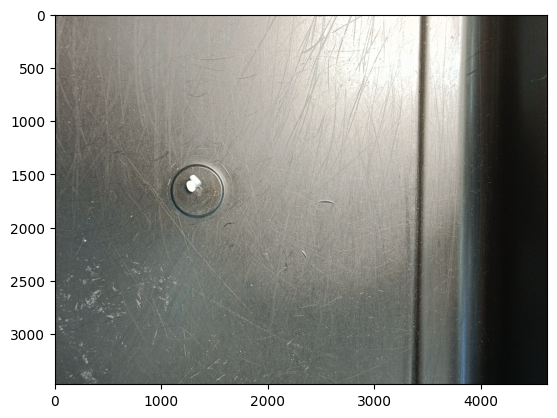

In [ ]:
#exemplo imagem Geminado
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(geminado_dir+'GEMINADO.png')
plt.imshow(img)

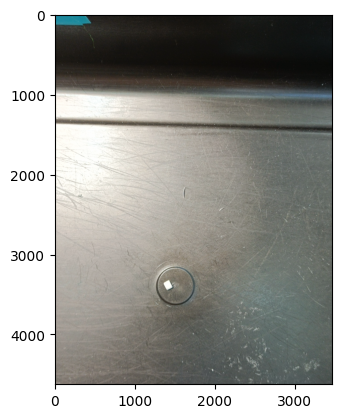

In [ ]:
#exemplo imagem normal
img = cv2.imread(normal_dir+'NORMAL.png')
plt.imshow(img)

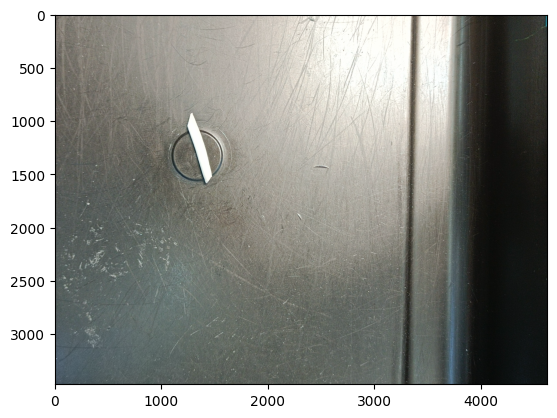

In [ ]:
#exemplo imagem PALITO
img = cv2.imread(palito_dir+'PALITO.png')
plt.imshow(img)

In [ ]:
img.shape

(3472, 4624, 3)

In [ ]:
urls = os.listdir(geminado_dir)
path = geminado_dir + urls[0]
path

'/content/drive/MyDrive/RESINA/GEMINADO/IMG_20230428_162618.jpg'

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
geminado_path = geminado_dir
geminadoUrl = os.listdir(geminado_path)
geminadoImages, geminadoTargets = loadImages(geminado_path, geminadoUrl, 1)

In [ ]:
len(geminadoUrl), len(geminadoImages), len(geminadoTargets)

(135, 135, 135)

In [ ]:
geminadoUrl[0], geminadoImages[0], geminadoTargets[0]

('IMG_20230428_162618.jpg',
 array([[[0.43913882, 0.40776627, 0.38031529],
         [0.4335702 , 0.39827608, 0.36298196],
         [0.52865098, 0.50041569, 0.46512157],
         ...,
         [0.22506667, 0.21330196, 0.19369412],
         [0.19647216, 0.19647216, 0.17294275],
         [0.21066353, 0.19889882, 0.17929098]],
 
        [[0.46180078, 0.43042824, 0.40297725],
         [0.43506353, 0.40761255, 0.37231843],
         [0.48894902, 0.44581176, 0.41443922],
         ...,
         [0.18320784, 0.18383529, 0.16814902],
         [0.1672251 , 0.16557804, 0.14534275],
         [0.18117647, 0.17333333, 0.14196078]],
 
        [[0.42308235, 0.39955294, 0.37210196],
         [0.53080784, 0.49551373, 0.46021961],
         [0.50862745, 0.47333333, 0.42235294],
         ...,
         [0.15596078, 0.14419608, 0.1285098 ],
         [0.21261961, 0.2008549 , 0.18516863],
         [0.19332549, 0.18156078, 0.16195294]],
 
        ...,
 
        [[0.30393725, 0.33138824, 0.34315294],
         [0.2

In [ ]:
normal_path = normal_dir
normalUrl = os.listdir(normal_path)
normalImages,normalTargets = loadImages(normal_path, normalUrl, 0)

In [ ]:
len(normalUrl), len(normalImages), len(normalTargets)

(135, 135, 135)

In [ ]:
normalUrl[0], normalImages[0], normalTargets[0]

('IMG_20230428_171713.jpg',
 array([[[0.14023529, 0.53631373, 0.59513725],
         [0.10148706, 0.51717333, 0.58384   ],
         [0.14470588, 0.55647059, 0.63882353],
         ...,
         [0.06290196, 0.0707451 , 0.0707451 ],
         [0.05003451, 0.06015216, 0.05560314],
         [0.05963294, 0.07531922, 0.07924078]],
 
        [[0.13435451, 0.5225898 , 0.60886431],
         [0.12886275, 0.52494118, 0.61121569],
         [0.1329098 , 0.5329098 , 0.61918431],
         ...,
         [0.08306667, 0.0909098 , 0.0909098 ],
         [0.05551529, 0.07512314, 0.07120157],
         [0.06846902, 0.07631216, 0.07631216]],
 
        [[0.1772549 , 0.54627451, 0.63529412],
         [0.19018824, 0.57450196, 0.6450902 ],
         [0.17517647, 0.55870588, 0.62145098],
         ...,
         [0.08415686, 0.10376471, 0.09984314],
         [0.0648549 , 0.08446275, 0.08054118],
         [0.05402353, 0.0697098 , 0.07363137]],
 
        ...,
 
        [[0.56196078, 0.53843137, 0.51882353],
         [0.5

In [ ]:
palito_path = palito_dir
palitoUrl = os.listdir(palito_path)
palitoImages,palitoTargets = loadImages(palito_path, palitoUrl, 2)

In [ ]:
len(palitoUrl), len(palitoImages), len(palitoTargets)

(135, 135, 135)

In [ ]:
palitoUrl[0], palitoImages[0], palitoTargets[0]

('IMG_20230428_163609.jpg',
 array([[[0.57469176, 0.55116235, 0.52371137],
         [0.41035608, 0.38682667, 0.34368941],
         [0.44815686, 0.41678431, 0.38933333],
         ...,
         [0.24054902, 0.23662745, 0.22094118],
         [0.19952784, 0.19560627, 0.17992   ],
         [0.24021176, 0.2480549 , 0.22452549]],
 
        [[0.54878275, 0.51348863, 0.47819451],
         [0.55984784, 0.53529882, 0.50329882],
         [0.46861176, 0.4419451 , 0.40665098],
         ...,
         [0.17492549, 0.17139608, 0.15492549],
         [0.0974902 , 0.0974902 , 0.0974902 ],
         [0.18784157, 0.17937098, 0.16368471]],
 
        [[0.5227451 , 0.49137255, 0.46392157],
         [0.53043922, 0.51083137, 0.47553725],
         [0.46941176, 0.44980392, 0.4145098 ],
         ...,
         [0.17776471, 0.17776471, 0.15423529],
         [0.10643137, 0.1025098 , 0.08682353],
         [0.24122353, 0.22945882, 0.20985098]],
 
        ...,
 
        [[0.28378824, 0.34261176, 0.37790588],
         [0.2

In [ ]:
geminadoImages.shape, normalImages.shape, palitoImages.shape

((135, 100, 100, 3), (135, 100, 100, 3), (135, 100, 100, 3))

In [ ]:
data = np.r_[geminadoImages, normalImages, palitoImages]
data.shape

(405, 100, 100, 3)

In [ ]:
targets = np.r_[geminadoTargets, normalTargets, palitoTargets]
targets.shape

(405,)

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(data, targets, test_size=0.20, stratify=targets, random_state=42)

In [ ]:
#Trabalhando com o dataset
#fazendo download e carga nas variaveis
#(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(324, 100, 100, 3)
(81, 100, 100, 3)


In [ ]:
x_train[0]

array([[[0.0400251 , 0.04786824, 0.04786824],
        [0.05819765, 0.06604078, 0.06604078],
        [0.05563137, 0.06347451, 0.06347451],
        ...,
        [0.264     , 0.29145098, 0.30321569],
        [0.24580706, 0.28894431, 0.30463059],
        [0.22590902, 0.26512471, 0.29257569]],

       [[0.05011765, 0.05960784, 0.05631373],
        [0.06699451, 0.07875922, 0.07091608],
        [0.04618824, 0.05795294, 0.0501098 ],
        ...,
        [0.30454118, 0.34375686, 0.37120784],
        [0.29505412, 0.33819137, 0.35387765],
        [0.26470118, 0.30391686, 0.33136784]],

       [[0.05098039, 0.05882353, 0.05882353],
        [0.07058824, 0.08235294, 0.0745098 ],
        [0.05176471, 0.06352941, 0.05568627],
        ...,
        [0.27788235, 0.31709804, 0.34454902],
        [0.25279216, 0.29200784, 0.31945882],
        [0.28991373, 0.33697255, 0.36050196]],

       ...,

       [[0.16737255, 0.18698039, 0.17913725],
        [0.25144314, 0.23967843, 0.22007059],
        [0.17843137, 0

In [ ]:
y_train[0]

2

In [ ]:
#tentar converter os rótulos para uma forma de categoria
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

2

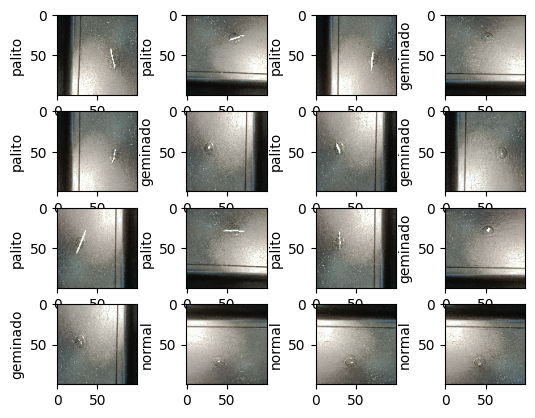

In [ ]:
#cria lista de rótulos para as imagens
category_dict = {0:'normal', 1:'geminado',2:'palito'}

#mostrar algumas imagens do dataset
plt.figure()
for i in range(16):
  #cria um grafico de 4 x 4
  plt.subplot(4,4,i+1)
  #mostra a imagem
  plt.imshow(x_train[i])
  #mostra o rotulo
  plt.ylabel(category_dict[y_train[i]])
plt.show()

In [ ]:
#criação da rede neural
def CNN_classification_model(input_size = x_train.shape[1:]):
  #cria modelo
  model = Sequential()
  #adiciona camada convolucional de entrada
  model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
  #define função de ativação
  model.add(Activation('relu'))

  #primeiro bloco
  model.add(Conv2D(32, (3,3)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=1))

  #segundo bloco
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  #camada diretamente conectada (flatten/dense) e de saída
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  #usando otimizador adam com taxa padrão de aprendizagem
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  #cria o modelo usa crossentropia e acurácia para avaliar
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
                metrics=['accuracy'])
  #model.compile()
  return model

#cria modelo da CNN
model=CNN_classification_model()

#mostra como a CNN ficou
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 97, 97, 64)        18496     
                                                        

In [ ]:
#carrega os avaliadores do cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_geminado.h5"
checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1,
                             save_best_only=True, mode='max')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#Nos auxiliara a reduzir a taxa de aprendizado pelo fator (factor) caso não ocorra a mudança no loss.
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta=1e-5,
                              patience=5, verbose=1)
#Array dos callbacks
callbacks = [checkpoint, lr_reduce]

In [ ]:
#treina o modelo
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, verbose=1, callbacks=model_checkpoint)
model.fit(x_train, y_train,batch_size=32,epochs=5,
          validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/5
11/11 [==============================] - ETA: 0s - loss: 1.1735 - accuracy: 0.3642
Epoch 1: loss improved from -inf to 1.17350, saving model to final_geminado.h5
11/11 [==============================] - 34s 3s/step - loss: 1.1735 - accuracy: 0.3642 - val_loss: 0.9428 - val_accuracy: 0.7778 - lr: 1.0000e-04
Epoch 2/5
11/11 [==============================] - ETA: 0s - loss: 0.9258 - accuracy: 0.5833
Epoch 2: loss did not improve from 1.17350
11/11 [==============================] - 30s 3s/step - loss: 0.9258 - accuracy: 0.5833 - val_loss: 0.7203 - val_accuracy: 0.9630 - lr: 1.0000e-04
Epoch 3/5
11/11 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.8056
Epoch 3: loss did not improve from 1.17350
11/11 [==============================] - 28s 3s/step - loss: 0.6765 - accuracy: 0.8056 - val_loss: 0.4760 - val_accuracy: 0.9753 - lr: 1.0000e-04
Epoch 4/5
11/11 [==============================] - ETA: 0s - loss: 0.4009 - accuracy: 0.9506
Epoch 4: loss did not imp

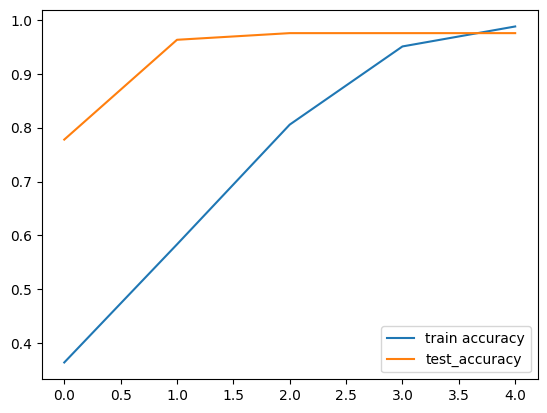

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

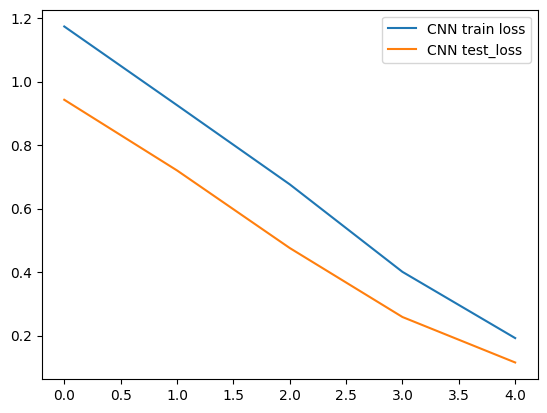

In [ ]:
plt.plot(model.history.history['loss'], label = 'CNN train loss')
plt.plot(model.history.history['val_loss'],label = 'CNN test_loss')
plt.legend()
plt.show()

3/3 [==============================] - 2s 455ms/step
Métricas médias
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.96      1.00      0.98        27
           2       1.00      0.93      0.96        27

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81

Acurácia: 0.9753
Precisão: 0.9762
Cobertura(recall): 0.9753
F1(weighted): 0.9751
PRF support: (array([0.96428571, 0.96428571, 1.        ]), array([1.        , 1.        , 0.92592593]), array([0.98181818, 0.98181818, 0.96153846]), array([27, 27, 27]))
Cohen Kappa: 0.9630
Acurácia: 0.9753
Sensitividade: 1.0000
Especificidade: 1.0000


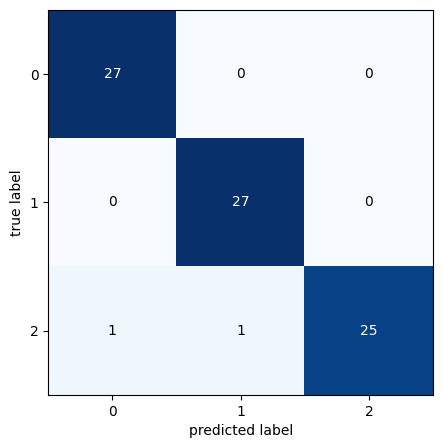

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score, precision_recall_curve, precision_recall_fscore_support
#Gerando Matriz de confusão

from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1)
y_true = y_test
cm = confusion_matrix(y_true, pred)

total = sum(sum(cm))

print('Métricas médias')
print(classification_report(y_true, pred))
print("Acurácia: {:.4f}".format(accuracy_score(y_true, pred)))
print("Precisão: {:.4f}".format(precision_score(y_true, pred, average='weighted')))
print("Cobertura(recall): {:.4f}".format(recall_score(y_true, pred, average='weighted')))
print("F1(weighted): {:.4f}".format(f1_score(y_true, pred, average='weighted')))
print("PRF support:",precision_recall_fscore_support(y_true, pred))

print("Cohen Kappa: {:.4f}".format(cohen_kappa_score(y_true, pred)))

acc = (cm[0, 0] + cm[1, 1] + cm[2, 2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])#?
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])#?

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

3/3 [==============================] - 2s 696ms/step - loss: 0.1156 - accuracy: 0.9753


[0.11555039137601852, 0.9753086566925049]

In [ ]:
#avaliação do modelo
new_model = CNN_classification_model()
new_model.load_weights('final_geminado.h5')

new_model.evaluate(x_test, y_test, verbose=1)

3/3 [==============================] - 2s 458ms/step - loss: 0.9428 - accuracy: 0.7778


[0.9427610039710999, 0.7777777910232544]

In [ ]:
#predição
new_model.predict(x_test[0:1])

1/1 [==============================] - 0s 87ms/step


array([[0.3432148 , 0.3855113 , 0.2645704 , 0.00670348]], dtype=float32)

In [ ]:
#outra forma de ver a predição se o comando acima der algum erro
np.argmax(new_model.predict(x_test[0:1]), axis=-1)

1/1 [==============================] - 0s 38ms/step


array([1])

1/1 [==============================] - 0s 198ms/step


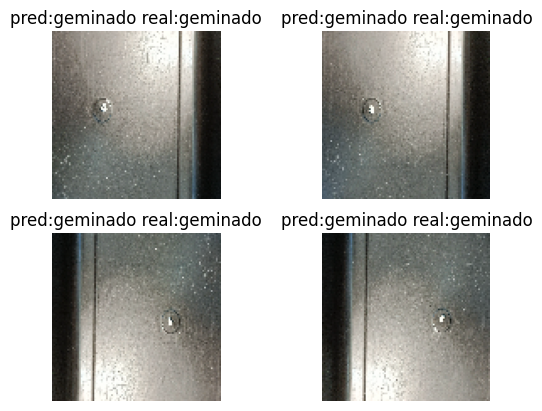

In [ ]:
# lista de rotulos preditos
pred_list = []

plt.figure()

for i in range(0,4):
  plt.subplot(2,2, i+1)
  #plota
  plt.imshow(x_test[i])
  #prediz
  #pred = new_model.predict(x_test[0:10])
  #outra forma de predicao se a acima nao funcionar
  pred = np.argmax(new_model.predict(x_test[0:10]), axis=-1)
  pred_list.append(pred)
  #mostra os rotulos da imagens e as predições
  x = category_dict[pred[i]]
  y = category_dict[y_test[i]]
  plt.title("pred:" + x + " real:" + y)
  plt.axis('off')
plt.show()